In [43]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import plotly.express as px
import warnings
import ipywidgets as widgets
from ipywidgets import interact, interactive, interact_manual
import plotly.graph_objects as go
import folium
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from tqdm.notebook import trange, tqdm
from sklearn.metrics import mean_squared_error
from math import sqrt

# Supress scientific notation/warning
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings("ignore")

## Load Data

In [2]:
# World Confirmed Cases
confirmed_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
# World Death Cases
death_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

### DataFrame Cleaning

In [3]:
# Get a list of columns, this serves to know which ones to clean
list(confirmed_df.columns)[0:5]

['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20']

In [4]:
# Get a list of columns, this serves to know which ones to clean
list(death_df.columns)[0:5]

['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20']

In [5]:
confirmed_df.sample(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20
141,NaN,Hungary,47.16250,19.50330,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,4,7,9,9,13,13,19,30,32,39,50,58,73,85,103,131,167,187,226,261,300,343,408,447,492,525,585,623,678,733,744,817,895,980,1190,1310,1410,1458,1512,1579,1652,1763,1834,1916,1984,2098,2168,2284,2443,2443,2500,2583,2649,2727,2775,2863,2942,2998,3035,3065,3111,3150,3178,3213,3263,3284,3313,3341,3380,3417,3473,3509,3535,3556,3598,3641,3678,3713,3741,3756,3771,3793,3816,3841,3867,3876,3892,3921,3931,3954,3970,3990,4008,4014,4017,4027,4039,4053,4064,4069,4076,4077,4078,4079,4081,4086,4094,4102,4107,4114,4123,4127,4138,4142,4145,4155,4157,4166,4172,4174,4183,4189,4205,4210,4220,4223,4229,4234,4247,4258,4263,4279,4293,4315,4333,4339,4347,4366,4380,4398,4424,4435,4448,4456,4465,4484,4505,4526,4535,4544,4553,4564,4597,4621,4653,4696,4731,4746,4768,4813,4853,4877,4916,4946,4970,5002,5046,5098,5133,5155,5191,5215,5288,5379,5511,5669,5961,6139,6257,6622,6923,7382,7892,8387,8963,9304,9715,10191,10909,11825,12309,13153,13879,14460,15170,16111,16920,17990,18866,19499,20450,21200,22127,23077,24014,24716,25567,26461,27309,28631,29717,30575,31480,32298,33114
61,Guangdong,China,23.34170,113.42440,26,32,53,78,111,151,207,277,354,436,535,632,725,813,895,970,1034,1095,1131,1159,1177,1219,1241,1261,1294,1316,1322,1328,1331,1332,1333,1339,1342,1345,1347,1347,1347,1348,1349,1349,1350,1350,1350,1351,1352,1352,1352,1352,1353,1356,1356,1356,1356,1360,1361,1364,1370,1378,1395,1400,1413,1415,1428,1433,1448,1456,1467,1475,1484,1494,1501,1507,1514,1516,1524,1532,1533,1536,1539,1544,1548,1552,1555,1564,1566,1571,1577,1579,1580,1581,1582,1582,1585,1585,1586,1587,1587,1588,1588,1588,1588,1588,1588,1588,1588,1589,1589,1589,1589,1589,1589,1589,1589,1589,1589,1590,1590,1590,1590,1590,1590,1591,1592,1592,1592,1592,1592,1592,1593,1593,1595,1596,1597,1598,1598,1601,1602,1602,1604,1604,1607,1607,1608,1625,1625,1628,1628,1628,1631,1631,1634,1634

In [6]:
# Drop Unused columns for confirmed (Only keep columns needed, in this case Province_State and latest numbers
confirmed_df.drop(columns=['Province/State','Lat','Long'], inplace=True)

In [7]:
# Drop Unused columns for confirmed (Only keep columns needed, in this case Province_State and latest numbers
death_df.drop(columns=['Province/State','Lat','Long'], inplace=True)

In [8]:
confirmed_df.sample(3)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20
264,Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,3,3,3,12,16,22,28,29,35,35,36,39,39,39,39,39,39,39,39,40,40,43,45,45,48,48,52,57,61,65,70,74,76,84,84,88,88,95,97,106,109,119,124,137,138,146,153,167,252,267,267,441,446,654,654,679,753,761,772,832,866,920,920,920,920,920,1057,1057,1057,1057,1057,1089,1089,1089,1089,1089,1089,1089,1200,1200,1200,1200,1321,1357,1358,1382,1405,1412,1416,1430,1430,1430,1430,1477,1489,1497,1531,1531,1557,1568,1594,1632,1632,1632,1632,1632,1632,1895,1895,1895,1895,1895,1895,1895,1895,1895,1895,2810,2980,2980,3326,3386,3583,3789,3856,4328,4481,4552,5002,5249,5555,5963,6228,6347,6580,6793,7022,7164,7486,7903,8085,8210,8275,8501,8663,9021,9186,9343,9839,9981,10218,10372,10627,10831,11082,11148,11285,11376,11601,11779,11902,12025,12097,12381,12415,12523,12639,12709,12776,12836,12952,13112,13214,13323,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175,14389,14443,14491,14515,14612,14641,14660,14715,14759,14802,14830,14974,15052,15089,15170,15224
262,Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
116,France,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,5,7,11,11,11,11,15,18,18,20,23,28,28,28,28,28,43,43,51,51,57,61,61,72,72,77,83,83,83,86,86,86,86,86,96,96,96,97,97,97,107,111,111,111,111,125

In [9]:
death_df.sample(3)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20
38,Cameroon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,6,6,6,6,7,8,9,9,9,9,10,10,12,12,12,12,14,17,22,22,22,42,42,43,43,43,43,53,56,58,58,61,61,61,64,64,64,64,108,108,108,108,114,125,125,136,139,140,140,140,140,140,146,156,159,159,165,165,175,175,175,177,191,191,199,200,200,203,205,212,212,212,212,212,212,212,212,212,276,276,276,276,282,301,303,308,313,313,313,313,313,313,313,313,313,313,313,313,313,313,359,359,359,359,359,359,359,359,359,373,373,373,373,373,382,382,382,385,385,385,391,391,391,391,391,391,391,391,391,391,391,391,395,395,395,398,401,401,401,401,401,403,406,406,408,408,408,408,408,410,410,411,411,411,411,411,414,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,416,416,416,416,416,416,418,418,418,418,418,418,418,418,420,420,420,420,420,420
70,China,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
50,Canada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5,4,4,4,6,8,18,22,22,22,31,33,36,61,61,75,121,150,175,216,241,289,328,360,435,487,630,688,688,820,939,1044,1134,1243,1340,1446,1516,1600,1683,1762,1859,2022,2136,2206,2281,2399,2511,2632,2726,2787,2929,3014,3132,3221,3352,3402,3484,3563,3597,3648,3719,3801,3866,3941,3985,4070,4140,4229,4303,4363,4439,4641,4661,4713,4794,4885,4935,4970,4978,4984,5029,5081,5105,5148,5195,5222,5242,5269,5298,5340,5375,5408,5417,5417,5424,5441,5448,5448,5448,5448,54

In [10]:
# Create grouped dataframes for entire world
world_confirmed_grouped_df = confirmed_df.groupby('Country/Region').sum()
world_death_grouped_df     = death_df.groupby('Country/Region').sum()

In [11]:
world_confirmed_grouped_df.sample(2)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Qatar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,7,8,8,8,8,15,18,24,262,262,320,337,401,439,439,452,460,470,481,494,501,526,537,549,562,590,634,693,781,835,949,1075,1325,1604,1832,2057,2210,2376,2512,2728,2979,3231,3428,3711,4103,4663,5008,5448,6015,6533,7141,7764,8525,9358,10287,11244,11921,12564,13409,14096,14872,15551,16191,17142,17972,18890,20201,21331,22520,23623,25149,26539,28272,29425,30972,32604,33969,35606,37097,38651,40481,42213,43714,45465,47207,48947,50914,52907,55262,56910,58433,60259,62160,63741,65495,67195,68790,70158,71879,73595,75071,76588,78416,79602,80876,82077,83174,84441,85462,86488,87369,88403,89579,90778,91838,92784,93663,94413,95106,96088,97003,97897,98653,99183,99799,100345,100945,101553,102110,102630,103128,103598,104016,104533,104983,105477,105898,106308,106648,107037,107430,107871,108244,108638,109036,109305,109597,109880,110153,110460,110695,110911,111107,111322,111538,111805,112092,112383,112650,112947,113262,113646,113938,114281,114532,114809,115080,115368,115661,115956,116224,116481,116765,117008,117266,117498,117742,117988,118196,118407,118575,118778,118994,119206,119420,119637,119864,120095,120348,120579,120846,121052,121287,121523,121740,121975,122214,122449,122693,122917,123146,123376,123604,123917,124175,124425,124650,124850,125084,125311,125533,125760,125959,126164,126339,126498,126692,126943,127181
Equatorial Guinea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,4,6,6,6,6,9,9,9,12,12,12,12,12,12,15,15,16,16,16,16,16,18,18,18,18,21,21,41,51,51,79,79,79,79,83,84,84,214,258,258,258,315,315,315,315,315,315,315,315,439,439,439,439,439,439,439,522,583,5

In [12]:
world_death_grouped_df.sample(2)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Lithuania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,5,7,7,7,8,8,9,9,11,13,15,15,15,16,22,23,23,24,29,30,32,33,33,35,37,38,38,40,40,41,41,41,44,45,45,45,46,46,46,46,48,49,49,49,50,50,50,54,54,54,55,56,59,60,60,61,61,63,63,63,65,66,68,68,70,70,70,71,71,71,71,71,71,71,72,74,74,74,75,75,76,76,76,76,76,76,76,76,77,78,78,78,78,78,78,78,78,78,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,82,83,84,84,85,85,85,85,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,87,87,87,87,87,87,87,87,87,87,87,89,89,89,91,92,92,92,92,93,94,94,94,99,101
Ethiopia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,7,8,8,11,12,14,17,18,19,20,27,27,32,35,40,47,55,57,60,61,63,65,72,72,74,75,75,78,81,89,94,98,103,103,103,103,103,103,103,103,103,120,120,124,124,127,128,139,146,148,150,163,167,170,180,188,197,200,209,223,228,239,253,263,274,284,310,336,343,356,365,380,390,407,420,440,463,479,492,509,528,544,572,600,620,637,662,678,692,709,725,745,758,770,793,809,828,846,856,880,897,918,933,949,966,974,986,996,1013,1022,1035,1045,1060,1072,1089,1096,1108,1127,1141,1148,1155,1165,1170,1177,1191,1198,1205,1208,1214,1222,1230,1238,1255


In [13]:
# Add the option to run analysis for the whole world (treat it as another region)
# Entire world numbers, returns Series with total daily numbers, create dataframe to 
# add at end of current data

all_confirmed_df = pd.DataFrame(world_confirmed_grouped_df.sum(), columns=["World"])
all_death_df     = pd.DataFrame(world_death_grouped_df.sum(), columns=["World"])

# Transpose so Series becomes row in df. Rename column to match 
all_confirmed_df.T.index.rename('Country/Region', inplace=True)
all_death_df.T.index.rename('Country/Region', inplace=True)

In [14]:
all_confirmed_df.T

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
World,555,654,941,1434,2118,2927,5578,6167,8235,9927,12038,16787,19887,23898,27643,30803,34396,37130,40160,42769,44811,45229,60382,66909,69051,71235,73270,75152,75652,76212,76841,78602,78982,79546,80399,81376,82736,84121,86014,88397,90375,92959,95276,98040,102040,106102,110062,114025,119036,126717,132506,146887,157965,169258,184002,199932,219462,246618,277253,309223,343456,386823,428295,479279,542006,606988,674380,733777,799018,875842,952368,1033702,1116958,1197315,1269291,1342524,1420265,1504296,1590776,1678316,1754531,1849884,1920029,1991375,2073248,2170168,2257981,2331375,2411347,2485850,2561729,2639748,2727991,2812178,2895859,2968049,3037754,3113246,3190735,3274139,3361356,3441576,3518135,3595235,3675767,3765725,3854800,3946080,4031014,4106229,4183146,4267441,4352288,4449054,4545482,4639704,4717128,4805859,4903092,5005903,5112508,5218600,5323287,5417853,5504248,5597560,5700620,5820202,5941244,6078261,6184917,6280511,6401952,6520126,6647409,6778310,6913202,7025172,7127703,7252461,7387034,7525216,7653814,7789270,7922027,8041844,8183744,8326301,8466697,8646596,8803922,8932267,9070200,9235569,9406545,9584905,9776335,9954911,10116803,10273032,10447289,10664533,10872669,11075391,11269302,11452292,11617941,11828915,12041312,12269423,12501740,12718142,12910765,13103070,13324389,13555611,13808279,14050533,14287418,14501583,14708250,14941878,15222711,15505806,15786391,16042089,16255260,16481553,16733998,17023686,17304066,17594163,17844596,18073489,18275011,18533677,18805749,19090844,19371914,19631160,19854598,20082310,20337232,20615100,20901479,21206137,21454001,21665916,21875838,22132337,22406764,22673939,22944256,23209579,23415376,23641687,23883773,24172616,24451719,24733263,24994138,2522040

In [15]:
# Concatenate dataframes
world_confirmed_df = pd.concat([all_confirmed_df.T,world_confirmed_grouped_df])
world_death_df     = pd.concat([all_death_df.T,world_death_grouped_df])

In [16]:
world_confirmed_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
World,555,654,941,1434,2118,2927,5578,6167,8235,9927,12038,16787,19887,23898,27643,30803,34396,37130,40160,42769,44811,45229,60382,66909,69051,71235,73270,75152,75652,76212,76841,78602,78982,79546,80399,81376,82736,84121,86014,88397,90375,92959,95276,98040,102040,106102,110062,114025,119036,126717,132506,146887,157965,169258,184002,199932,219462,246618,277253,309223,343456,386823,428295,479279,542006,606988,674380,733777,799018,875842,952368,1033702,1116958,1197315,1269291,1342524,1420265,1504296,1590776,1678316,1754531,1849884,1920029,1991375,2073248,2170168,2257981,2331375,2411347,2485850,2561729,2639748,2727991,2812178,2895859,2968049,3037754,3113246,3190735,3274139,3361356,3441576,3518135,3595235,3675767,3765725,3854800,3946080,4031014,4106229,4183146,4267441,4352288,4449054,4545482,4639704,4717128,4805859,4903092,5005903,5112508,5218600,5323287,5417853,5504248,5597560,5700620,5820202,5941244,6078261,6184917,6280511,6401952,6520126,6647409,6778310,6913202,7025172,7127703,7252461,7387034,7525216,7653814,7789270,7922027,8041844,8183744,8326301,8466697,8646596,8803922,8932267,9070200,9235569,9406545,9584905,9776335,9954911,10116803,10273032,10447289,10664533,10872669,11075391,11269302,11452292,11617941,11828915,12041312,12269423,12501740,12718142,12910765,13103070,13324389,13555611,13808279,14050533,14287418,14501583,14708250,14941878,15222711,15505806,15786391,16042089,16255260,16481553,16733998,17023686,17304066,17594163,17844596,18073489,18275011,18533677,18805749,19090844,19371914,19631160,19854598,20082310,20337232,20615100,20901479,21206137,21454001,21665916,21875838,22132337,22406764,22673939,22944256,23209579,23415376,23641687,23883773,24172616,24451719,24733263,24994138,2522040

### Functions

In [17]:
def get_country_data(country_name, df):
    """Given a country name, return the Series with information"""    
    results = None    
    if(country_name in df.index):  
        results = df.loc[country_name]
        # Convert index to DateTime
        results.index = pd.to_datetime(results.index)
    return results

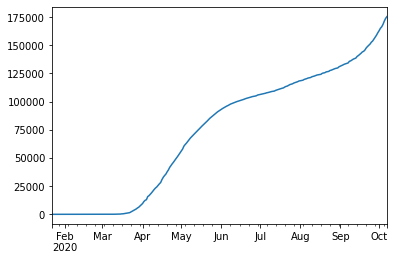

In [21]:
# Display confirmed cases of Canada (sample)
series = get_country_data("Canada", world_confirmed_df )
series.plot()
plt.show()

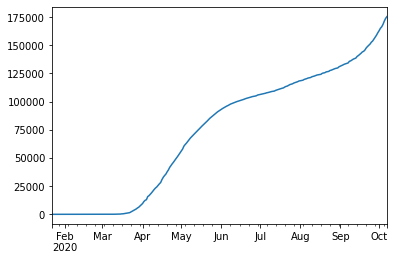

In [36]:
# Display confirmed cases of Canada (sample)
series = get_country_data("Canada", world_confirmed_df)
series.plot()
plt.show()

## Arima modeling

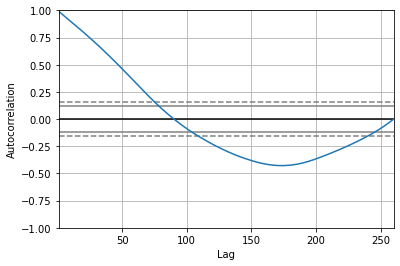

In [37]:
# Autocorrelation test
autocorrelation_plot(series)
plt.show()

Positive correlation in the first 80 to 90 lags, let's choose 10 for the AR parameter. Higher number makes ARIMA calcualtion longer

In [38]:
# Calculate arima for Canada 
model = ARIMA(series.values,order=(10,1,0), dates=series.index, freq='D')
model_fit = model.fit(disp=0)

In [39]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  259
Model:                ARIMA(10, 1, 0)   Log Likelihood               -1805.265
Method:                       css-mle   S.D. of innovations            255.532
Date:                Thu, 08 Oct 2020   AIC                           3634.529
Time:                        08:18:26   BIC                           3677.211
Sample:                    01-23-2020   HQIC                          3651.690
                         - 10-07-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        834.1547    433.515      1.924      0.054     -15.519    1683.828
ar.L1.D.y      0.0754      0.062      1.224      0.221      -0.045       0.196
ar.L2.D.y      0.1777      0.060      2.956      0.0

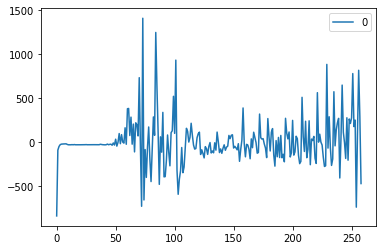

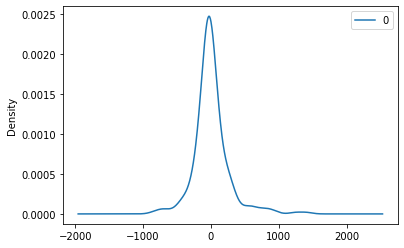

               0
count  259.00000
mean     7.49873
std    260.62716
min   -834.15473
25%    -93.21385
50%    -25.88217
75%     80.41464
max   1408.86533


In [40]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

#### Split train, test and predict, evaluate prediction

In [ ]:
def calculate_mse(series,train_size=65, arima_order=(10,1,0)):
    """Given a series, calculate the mse given the arima_order"""
    # Split train, test and predict
    X = series.values
    # Split train/test in rouhgly 65%/35%
    up_to = int(len(X) * 0.65)
    train, test = X[0:up_to], X[up_to:len(X)]
    # initial historical (train) data
    history = [x for x in train]
    # To keep track of predictions
    predictions = []
    for t in tqdm(range(len(test))):
        model = ARIMA(history, order=(10,1,0))
        model_fit = model.fit(disp=0)	
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        actual = test[t] 
        # Append real value to history 
        history.append(actual)
        # Uncomment if print desired 
        #print(f'Prediction={yhat}, Expected={actual}')
    # Calculate MSE    
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
    # plot
    plt.plot(test)
    plt.plot(predictions, color='red')
    plt.show()

In [45]:
# Calculate MSE for Canada (series)
calculate_mse(series)


Test MSE: 84000.074


NameError: name 'pyplot' is not defined

In [ ]:
series = get_country_data("World", df) 
series

In [ ]:
def plot_country_forecast(country_name, df=world_confirmed_df):
    """Given a country, predict future cases"""
    series = get_country_data(country_name, df) 
    model = ARIMA(series.values,order=(10,1,0), dates=series.index, freq='D')
    fig2, ax = plt.subplots(figsize=(12,8))
    ax = series.loc['2020-01-22':].plot(ax=ax, label="Confirmed")
    model_fit = model.fit(disp=0)
    model_fit.plot_predict('2020-09-26','2020-12-31', dynamic=True, ax=ax, plot_insample=False)
    plt.show()

In [ ]:
# Forecast
plot_country_forecast("Mexico")

In [ ]:
# Forecast US
plot_country_forecast("US")

In [ ]:
# Forecast US death
plot_country_forecast("US",df=world_death_df)

In [ ]:
# Forecast World
plot_country_forecast("World")

In [ ]:
# Forecast Death
plot_country_forecast("World",world_death_df)

### Conclusion

Based on confirmed and death forecasts, the US trajectory is going to continue to grow rapidly outward. It appears that by end of Oct, there will be sadly aboug 225,000 deaths in the US, and sadly about 1.2 in the world